# Employee Turnover Prediction

Objective:
The goal of this project is to predict whether an employee is likely to leave the company based on various features such as job satisfaction, salary, department, and more.




In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('HR_Data_Predict Employee Turnover.csv')

In [45]:
df.head()
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [46]:
df.dtypes


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [47]:
df.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [48]:
print(df.shape)
print(df.columns)

(14999, 10)
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


# Visualization

In [49]:
# Correlation Matrix

df.corr()

C:\Users\Sneha\AppData\Local\Temp\ipykernel_6020\1109500818.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.143081,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349240,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.143081,0.349240,1.000000,0.417145,0.196763,-0.004785,0.023982,-0.006080
average_montly_hours,-0.020048,0.339742,0.417145,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196763,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004785,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023982,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006080,-0.003544,0.067433,0.039245,-0.061788,1.000000



The correlation matrix shows the **pairwise linear relationship** between numeric variables.

- Values range from -1 (perfect negative) to +1 (perfect positive).
- we found that satisfaction_level had a negative correlation with turnover (left). 
That gave a key insight — dissatisfied employees are more likely to leave.

C:\Users\Sneha\AppData\Local\Temp\ipykernel_6020\4245347504.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True,)


<Axes: >

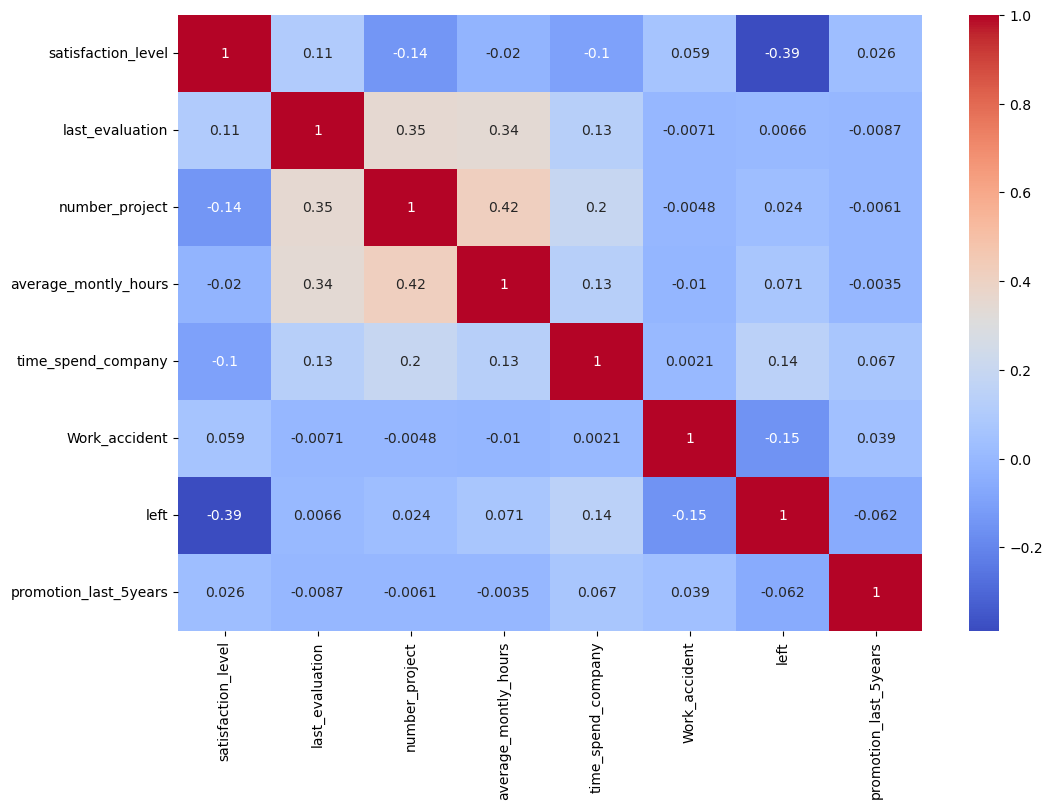

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,)

#Red shades - positive correlation
#Blue shades - negative correlation
#White or pale colors - values near 0

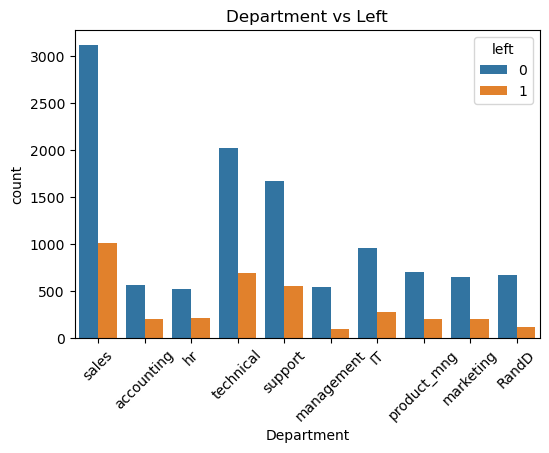

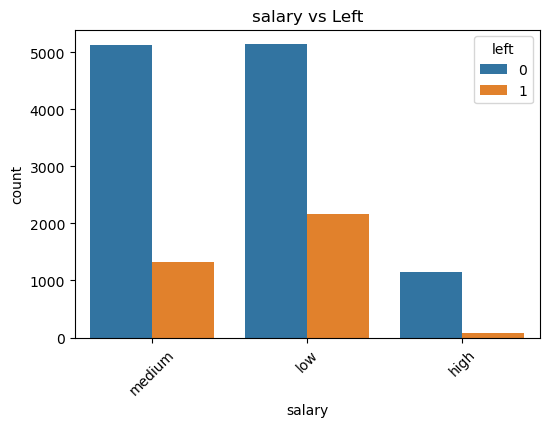

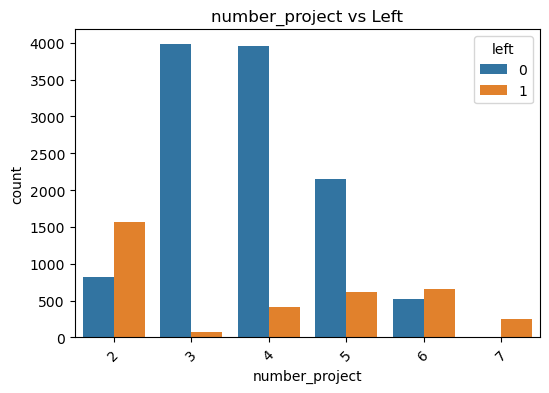

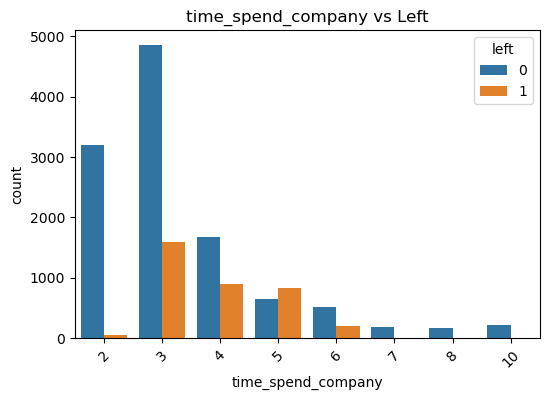

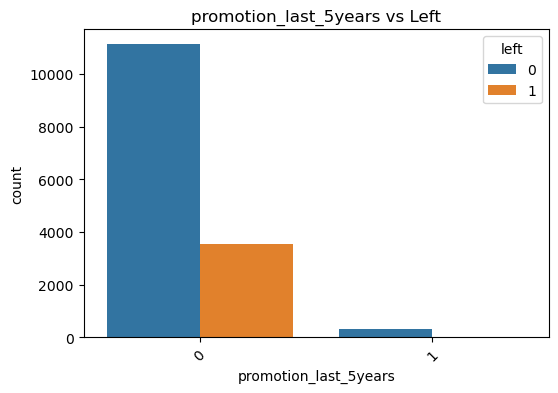

In [51]:
features = ['Department', 'salary','number_project','time_spend_company','promotion_last_5years']

# Creating plots
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df, hue='left')
    plt.title(f'{feature} vs Left')
    plt.xticks(rotation=45)
    plt.show()

**Conclusion**

 Promotion: Likely quit those who Havent recieved promotion 

 Time with Company: After 3 -6 year the employee, affection with organisation become the crucial factor.

 Number of project: if the opportunities are less or if the employee is over burdened , more chance of the employeee to quit the jobs.

 Salary : less and medium range salary is likely to leave.


In [52]:
df['Department'].unique()


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Due to many unique departments in Department column, model will not give accurate result . so merging columns such as 'IT','support','technica' into same column i.e 'technical' .

In [53]:
df['Department'] = np.where(df['Department']=='support','technical',df['Department'])
df['Department'] = np.where(df['Department']=='IT','technical',df['Department'])


In [54]:
df['left'].value_counts()


0    11428
1     3571
Name: left, dtype: int64

#  Encoding categorical variables

In [55]:
var_to_encode = ['Department','salary']
for col in var_to_encode:
    dummies = pd.get_dummies(df[col],prefix=col)
    df = pd.concat([df,dummies],axis=1)

# dropping original column
df.drop(var_to_encode, axis=1, inplace=True)

In [56]:
df.head()
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_technical,salary_high,salary_low,salary_medium
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14998,0.37,0.52,2,158,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [57]:
df.duplicated().sum()


3011

In [58]:
df.drop_duplicates(inplace=True)


In [59]:
df.shape


(11988, 19)

# Model Training

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [61]:
y = df['left']
X = df.drop('left', axis=1)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,logreg.predict(X_test)))

0.8426466499860995


In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [66]:
print(accuracy_score(y_test,rf.predict(X_test)))

0.9863775368362524


In [67]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [68]:
print(accuracy_score(y_test,svc.predict(X_test)))

0.9546844592716153


In [69]:
print("Logistic Regression:", accuracy_score(y_test, logreg.predict(X_test)))
print("Random Forest:", accuracy_score(y_test, rf.predict(X_test)))
print("SVM:", accuracy_score(y_test, svc.predict(X_test)))


Logistic Regression: 0.8426466499860995
Random Forest: 0.9863775368362524
SVM: 0.9546844592716153


In [70]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3027    3]
 [  46  521]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3030
           1       0.99      0.92      0.96       567

    accuracy                           0.99      3597
   macro avg       0.99      0.96      0.97      3597
weighted avg       0.99      0.99      0.99      3597



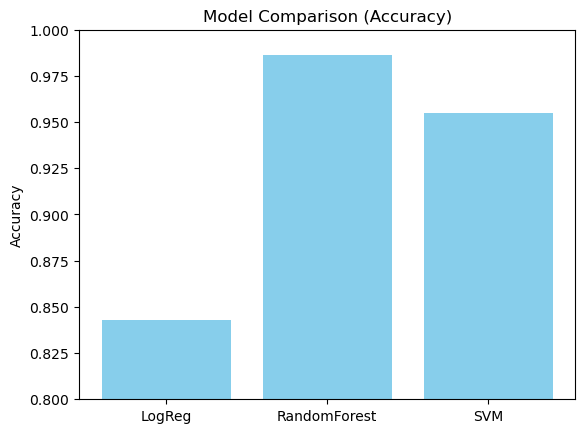

In [71]:
model_names = ['LogReg', 'RandomForest', 'SVM']
accuracies = [accuracy_score(y_test, logreg.predict(X_test)),
              accuracy_score(y_test, rf.predict(X_test)),
              accuracy_score(y_test, svc.predict(X_test))]

plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.show()


## 🧾 Conclusion

- The best-performing model was Random Forest with an accuracy of 98%.
- Important factors influencing employee turnover included `satisfaction_level`, `time_spend_company`, and `promotion_last_5years`.
- Insights from this model can help HR teams identify at-risk employees and take preventive action.


In [72]:

import joblib
joblib.dump(rf, 'employee_turnover_model.pkl')

['employee_turnover_model.pkl']

In [73]:
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']